In [4]:
from tyssue import Sheet

from tyssue import PlanarGeometry as geom

from tyssue.draw import sheet_view


In [16]:
x1 = int(input("Enter the value of x1 :"))
y1 = int(input("Enter the value of y1 :"))
x2 = int(input("Enter the value of x2 :"))
y2 = int(input("Enter the value of y2 :"))
x3 = int(input("Enter the value of x3 :"))
y3 = int(input("Enter the value of y3 :"))

a = (x1, y1)

b = (x2, y2)

c = (x3, y3)


Enter the value of x1 : 0
Enter the value of y1 : 0
Enter the value of x2 : 0
Enter the value of y2 : 1
Enter the value of x3 : 1
Enter the value of y3 : 0


In [71]:
# area = the absolute value of Ax(By - Cy) + Bx(Cy - Ay) + Cx(Ay - By) divided by 2

TriangleArea = abs( (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2 )


In [18]:
TriangleArea

0.5

In [19]:
#2D cell map

cellmap = Sheet.planar_sheet_2d( 
    '2D',
    nx=5, 
    ny=7, 
    distx=1, 
    disty=1
)

C++ extension are not available for this version


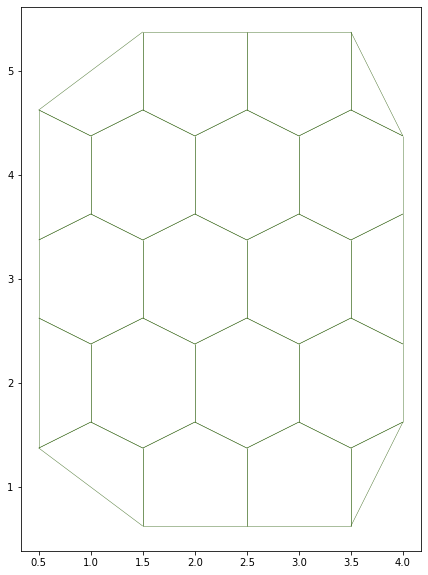

In [23]:
fig, axis = sheet_view(cellmap)

fig.set_size_inches(10, 10)

cellmap.sanitize ( trim_borders=True, order_edges=True )

geom.update_all(cellmap)


In [24]:
from tyssue import SheetGeometry

In [27]:
cellmap.vert_df.head()


y  is_active    x
vert                       
0     3.375          1  0.5
1     3.375          1  3.5
2     4.625          1  0.5
3     0.625          1  2.5
4     1.625          1  2.0

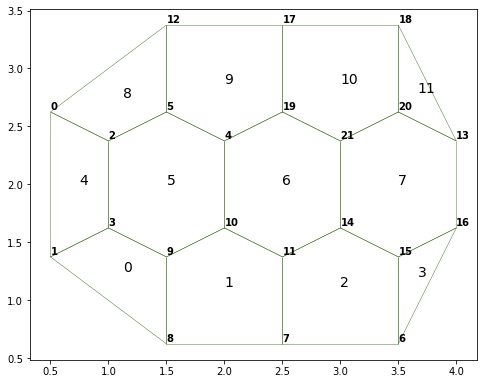

In [103]:
fig, ax = sheet_view(cellmap)
fig.set_size_inches(8, 8)

for vert, data in cellmap.vert_df.iterrows():
    ax.text(data.x, data.y+0.02, vert, weight="bold", color="black")
    
for face, data in cellmap.face_df.iterrows():
    ax.text(data.x, data.y, face, fontsize=14, color="black")

In [117]:
def triangle_area(x1,y1,x2,y2,x3,y3):
    area = abs( (x1*(y2-y3) + x2*(y3-y1) + x3*(y1-y2)) / 2 )
    return area

In [119]:
Triangle1 = triangle_area(3, 4, 4, 4, 5, 1)
Triangle1

1.5

In [138]:
coord = cellmap.vert_df[['x', 'y']]

In [142]:
coord.head()

x      y
vert            
0     0.5  2.625
1     0.5  1.375
2     1.0  2.375
3     1.0  1.625
4     2.0  2.375

In [175]:
cellmap.edge_df.head()

trgt       nz    length  face  srce   dx    dy   sx     sy   tx     ty  \
edge                                                                           
0        9  0.28125  0.750000     0     8  0.0  0.75  1.5  0.625  1.5  1.375   
1        3  0.15625  0.559017     0     9 -0.5  0.25  1.5  1.375  1.0  1.625   
2        1  0.21875  0.559017     0     3 -0.5 -0.25  1.0  1.625  0.5  1.375   
3        8  0.34375  1.250000     0     1  1.0 -0.75  0.5  1.375  1.5  0.625   
4        7  0.50000  1.000000     1     8  1.0  0.00  1.5  0.625  2.5  0.625   

         fx     fy   ux    uy  is_valid     rx     ry       phi  sub_area  
edge                                                                       
0     1.125  1.250  0.0  0.75      True  0.375 -0.625 -1.030377  0.140625  
1     1.125  1.250 -0.5  0.25      True  0.375  0.125  0.321751  0.078125  
2     1.125  1.250 -0.5 -0.25      True -0.125  0.375  1.892547  0.109375  
3     1.125  1.250  1.0 -0.75      True -0.625  0.125  2.944197  0.171875  
4     2.000  1.125  1.0  0.00      True -0.500 -0.500 -2.356194  0.250000

In [202]:
group = cellmap.edge_df
face_groups = group.groupby(['face'])
face_groups.groups


{0: [0, 1, 2, 3], 1: [4, 5, 6, 7, 8], 2: [9, 10, 11, 12, 13], 3: [14, 15, 16], 4: [17, 18, 19, 20], 5: [21, 22, 23, 24, 25, 26], 6: [27, 28, 29, 30, 31, 32], 7: [33, 34, 35, 36, 37, 38], 8: [39, 40, 41, 42], 9: [43, 44, 45, 46, 47], 10: [48, 49, 50, 51, 52], 11: [53, 54, 55]}

In [204]:
face_groups.groups[0]

Int64Index([0, 1, 2, 3], dtype='int64', name='edge')